In [32]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import seaborn as sns
from tqdm.notebook import tqdm

In [18]:
# Path to your .pkl file
file_path = 'D:/Waffer Data/WM811K.pkl'

# Open and load the data from the file
with open(file_path, 'rb') as file:
    data = pickle.load(file)

print(data)

        dieSize failureType   lotName trainTestLabel  waferIndex  \
0        1683.0        none      lot1       Training         1.0   
1        1683.0        none      lot1       Training         2.0   
2        1683.0        none      lot1       Training         3.0   
3        1683.0        none      lot1       Training         4.0   
4        1683.0        none      lot1       Training         5.0   
...         ...         ...       ...            ...         ...   
811452    600.0   Edge-Ring  lot47542           Test        23.0   
811453    600.0    Edge-Loc  lot47542           Test        24.0   
811454    600.0   Edge-Ring  lot47542           Test        25.0   
811455    600.0      [0, 0]  lot47543         [0, 0]         1.0   
811456    600.0      [0, 0]  lot47543         [0, 0]         2.0   

                                                 waferMap  
0       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
1       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
2  

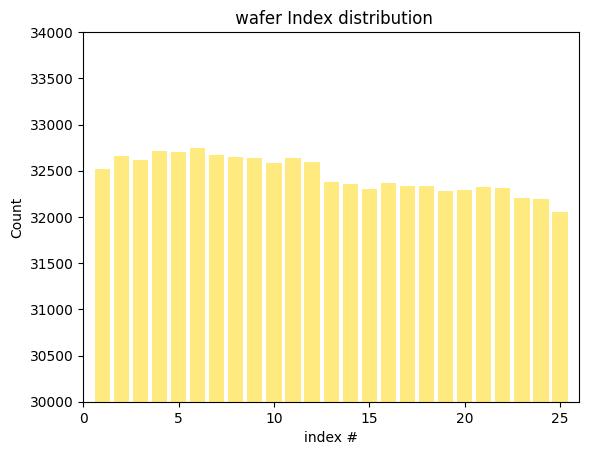

In [62]:
df = pd.DataFrame(data)


uni_Index=np.unique(df.waferIndex, return_counts=True)
plt.bar(uni_Index[0],uni_Index[1], color='gold', align='center', alpha=0.5)
plt.title(" wafer Index distribution")
plt.xlabel("index #")
plt.ylabel("Count")
plt.xlim(0,26)
plt.ylim(30000,34000)
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   dieSize         811457 non-null  float64
 1   failureType     811457 non-null  object 
 2   lotName         811457 non-null  object 
 3   trainTestLabel  811457 non-null  object 
 4   waferIndex      811457 non-null  float64
 5   waferMap        811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


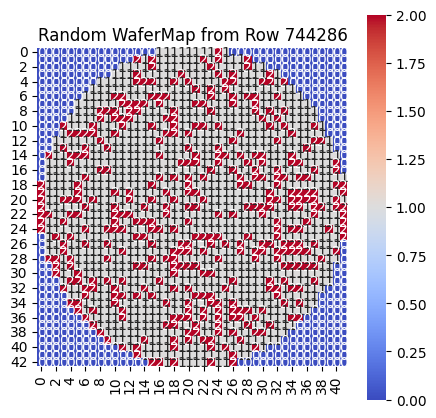

In [63]:
# Select a random row
random_row = df.sample(n=1).iloc[0]

# Extract the waferMap matrix from the selected row
wafer_map = random_row['waferMap']

# Display the waferMap matrix using seaborn heatmap or matplotlib
plt.figure(figsize=(5, 5))
sns.heatmap(wafer_map, cmap='coolwarm', square=True, annot=True, cbar=True)

# Add title showing which row was randomly selected
plt.title(f'Random WaferMap from Row {random_row.name}')
plt.show()

In [5]:
def find_dim(x):
    dim0=np.size(x,axis=0)
    dim1=np.size(x,axis=1)
    return dim0,dim1
df['waferMapDim']=df.waferMap.apply(find_dim)
df.sample(5)

,dieSize,failureType,lotName,trainTestLabel,waferIndex,waferMap,waferMapDim
409846,1970.0,"[0, 0]",lot24446,"[0, 0]",24.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","(51, 50)"
671935,712.0,"[0, 0]",lot41829,"[0, 0]",6.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1,...","(32, 29)"
349926,5532.0,"[0, 0]",lot20887,"[0, 0]",6.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","(60, 119)"
384997,2360.0,"[0, 0]",lot23081,"[0, 0]",11.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","(68, 65)"
293807,4096.0,"[0, 0]",lot17991,"[0, 0]",18.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","(72, 72)"


In [6]:
max(df.waferMapDim), min(df.waferMapDim)

((300, 202), (6, 21))

In [7]:
uni_waferDim=np.unique(df.waferMapDim, return_counts=True)
uni_waferDim[0].shape[0]

632

In [8]:
print(df['failureType'].apply(type).value_counts())  # Check the data types in the 'failureType' column
print(df['trainTestLabel'].apply(type).value_counts())  # Check the data types in the 'trainTestLabel' column

failureType
<class 'numpy.ndarray'>    638507
<class 'str'>              172950
Name: count, dtype: int64
trainTestLabel
<class 'numpy.ndarray'>    638507
<class 'str'>              172950
Name: count, dtype: int64


In [9]:
# Check if a row has either or both failure types as ndarray
def check_ndarray(x):
    # Check if the value is a list or array, return True if it is
    if isinstance(x, np.ndarray) or (isinstance(x, list) and any(isinstance(i, np.ndarray) for i in x)):
        return True
    return False

# Apply the check and filter rows
rows_with_ndarray = df[df['failureType'].apply(check_ndarray)]

# Apply the check and get a boolean mask for rows with ndarray
mask = df['failureType'].apply(check_ndarray)

# Print the number of rows that satisfy the condition
print(f"Number of rows with either one or both failure types as ndarray: {len(rows_with_ndarray)}")

# Remove the rows where failureType contains ndarray
df_cleaned = df[~mask]

# Print the number of rows that were removed
print(f"Number of rows removed: {mask.sum()}")

Number of rows with either one or both failure types as ndarray: 638507
Number of rows removed: 638507


In [26]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172950 entries, 0 to 811454
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   dieSize         172950 non-null  float64
 1   failureType     172950 non-null  object 
 2   lotName         172950 non-null  object 
 3   trainTestLabel  172950 non-null  object 
 4   waferIndex      172950 non-null  float64
 5   waferMap        172950 non-null  object 
 6   waferMapDim     172950 non-null  object 
dtypes: float64(2), object(5)
memory usage: 10.6+ MB


In [31]:
duplicates = df_cleaned[df_cleaned.duplicated(subset=['dieSize', 'failureType','waferIndex','lotName'])].sum()

duplicates

dieSize           0.0
failureType         0
lotName             0
trainTestLabel      0
waferIndex        0.0
waferMap            0
waferMapDim         0
dtype: object

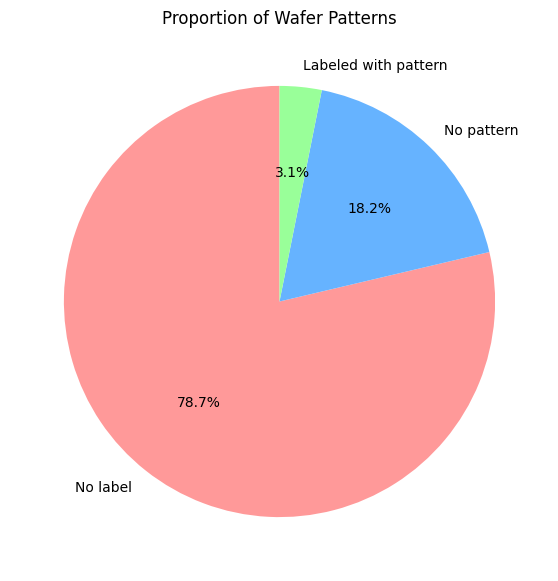

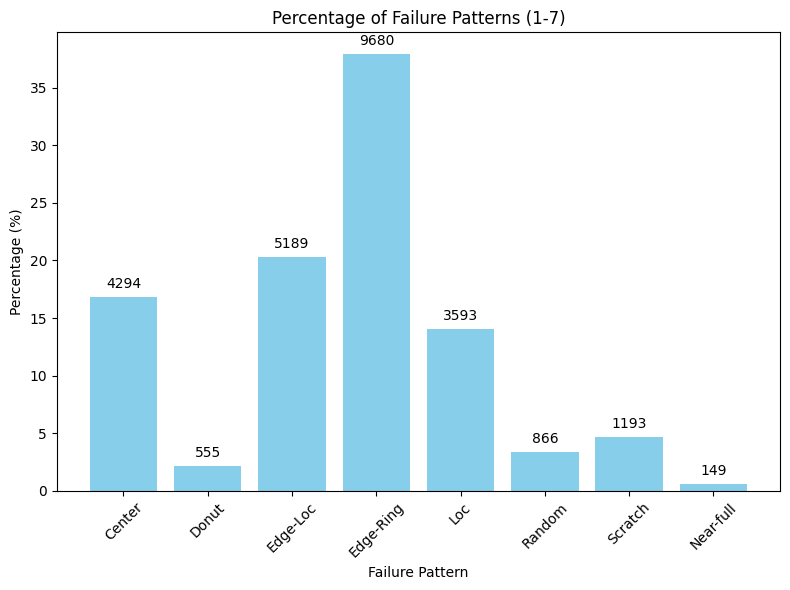

In [55]:
# Mapping of failure types to numerical values
mapping_type = {'Center': 0, 'Donut': 1, 'Edge-Loc': 2, 'Edge-Ring': 3, 
                'Loc': 4, 'Random': 5, 'Scratch': 6, 'Near-full': 7, 'none': 8, 'Unknown' : 9}

# Classify the rows into 'No label', 'Pattern 1-7', and 'No pattern'
def classify_failure(x):
    if isinstance(x, np.ndarray) and np.array_equal(x, [0, 0]):
        return 'No label'
    elif isinstance(x, str) and mapping_type.get(x) in range(0, 8):
        return 'Labeled with pattern'
    elif isinstance(x, str) and mapping_type.get(x) == 8:
        return 'No pattern'

# Apply the classification to the failureType column
df['failure_class'] = df['failureType'].apply(classify_failure)

# Step 1: Plot the Pie Chart
labels_count = df['failure_class'].value_counts()

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(labels_count, labels=labels_count.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Proportion of Wafer Patterns')
plt.show()

# Step 2: Plot the Bar Chart for Pattern 1-7 with Percentages
# Filter the patterns 1-7 and calculate their counts
pattern_0_to_7 = df[df['failure_class'] == 'Labeled with pattern']['failureType'].map(mapping_type)

# Count occurrences of patterns 1-7
pattern_0_to_7_count = pattern_0_to_7.value_counts().sort_index()

# Calculate percentages
total_labels = pattern_0_to_7_count.sum()  # Total number of 1-7 patterns
pattern_0_to_7_percent = (pattern_0_to_7_count / total_labels) * 100

# Create the bar chart with percentages
plt.figure(figsize=(8, 6))
bars = plt.bar(pattern_0_to_7_percent.index, pattern_0_to_7_percent, color='skyblue')

# Annotate the bars with the raw counts
for bar, count in zip(bars, pattern_0_to_7_count):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{count}', ha='center', va='bottom')

# Set the labels and title
plt.title('Percentage of Failure Patterns (1-7)')
plt.xlabel('Failure Pattern')
plt.ylabel('Percentage (%)')

# Customize x-axis ticks
plt.xticks(ticks=range(0, 8), labels=['Center','Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Random', 'Scratch', 'Near-full'], rotation=45)
plt.tight_layout()
plt.show()

In [69]:
# Function to check if the list is [0, 0] and return 'Unknown'
def replace_zero_zero(x):
    # Check if the element is exactly [0, 0]
    if isinstance(x, (list, np.ndarray)) and np.array_equal(x, [0, 0]):
        return 'Unknown'
    return x

# Step 1: Create a new DataFrame df_modified to keep the original df intact
df_modified = df.copy()

# Step 2: Apply the function to both 'failureType' and 'trainTestLabel' columns in df_modified
df_modified['failureType'] = df_modified['failureType'].apply(replace_zero_zero)
df_modified['trainTestLabel'] = df_modified['trainTestLabel'].apply(replace_zero_zero)

# Print the modified DataFrame (df_modified)
print("Modified DataFrame (df_modified):")
print(df_modified)


Modified DataFrame (df_modified):
        dieSize failureType   lotName trainTestLabel  waferIndex  \
0        1683.0        none      lot1       Training         1.0   
1        1683.0        none      lot1       Training         2.0   
2        1683.0        none      lot1       Training         3.0   
3        1683.0        none      lot1       Training         4.0   
4        1683.0        none      lot1       Training         5.0   
...         ...         ...       ...            ...         ...   
811452    600.0   Edge-Ring  lot47542           Test        23.0   
811453    600.0    Edge-Loc  lot47542           Test        24.0   
811454    600.0   Edge-Ring  lot47542           Test        25.0   
811455    600.0     Unknown  lot47543        Unknown         1.0   
811456    600.0     Unknown  lot47543        Unknown         2.0   

                                                 waferMap  
0       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
1       [[0, 0, 0, 0, 0, 0, 0

In [75]:
# Function to check if the list is [0, 0] and return 'Unknown'
def replace_zero_zero(x):
    if isinstance(x, (list, np.ndarray)) and np.array_equal(x, [0, 0]):
        return 'Unknown'
    return x

# Apply the replacement function to 'failureType' column in df_modified
df_modified['failureType'] = df_modified['failureType'].apply(replace_zero_zero)

# Step 1: Select a random lotName from df_modified
random_lot = df_modified['lotName'].sample(n=1).values[0]

# Step 2: Filter the DataFrame to get all rows (wafer indices) from the selected lot
lot_df = df_modified[df_modified['lotName'] == random_lot]

# Step 3: Display the failureType for each index in the selected lot
print(f"Randomly selected lot: {random_lot}")
print("Failure types in this lot:")

for idx, row in lot_df.iterrows():
    print(f"Index {row['waferIndex']}: Failure Type = {row['failureType']}")


Randomly selected lot: lot24180
Failure types in this lot:
Index 2.0: Failure Type = Unknown
Index 3.0: Failure Type = Unknown
Index 4.0: Failure Type = Unknown
Index 5.0: Failure Type = Unknown
Index 6.0: Failure Type = Unknown
Index 7.0: Failure Type = Unknown
Index 8.0: Failure Type = Unknown
Index 9.0: Failure Type = Unknown
Index 10.0: Failure Type = Unknown
Index 11.0: Failure Type = Unknown
Index 12.0: Failure Type = Unknown
Index 13.0: Failure Type = Unknown
Index 14.0: Failure Type = Unknown
Index 15.0: Failure Type = Unknown
Index 16.0: Failure Type = Unknown
Index 17.0: Failure Type = Unknown
Index 18.0: Failure Type = Unknown
Index 19.0: Failure Type = Unknown
Index 20.0: Failure Type = Unknown
Index 21.0: Failure Type = Unknown
Index 22.0: Failure Type = Unknown
Index 23.0: Failure Type = Unknown
Index 24.0: Failure Type = Unknown
Index 25.0: Failure Type = Unknown


In [57]:
mapping_type_reverse = {0: 'Center', 1: 'Donut', 2: 'Edge-Loc', 3: 'Edge-Ring', 4: 'Loc', 5: 'Random', 6: 'Scratch', 7: 'Near-full', 8: 'none', 9: 'Unknown'}


# UI Components
pattern_selector = widgets.Dropdown(
    options=[(mapping_type_reverse[i], i) for i in range(10)],  # from 0 to 9
    value=0,
    description='Pattern:',
)

sample_size_slider = widgets.IntSlider(
    value=5,
    min=1,
    max=100,
    step=1,
    description='Samples:',
    continuous_update=False
)

random_toggle = widgets.Checkbox(
    value=False,
    description='Random Sample',
    disabled=False
)

generate_button = widgets.Button(
    description='Visualize',
    button_style='success',
    icon='eye'
)

In [58]:
output_area = widgets.Output()

In [59]:
# Function to visualize the selected wafer maps from the cleaned DataFrame
def visualize_pattern(b):
    # Clear previous output
    with output_area:
        clear_output(wait=True)
        
        # Get user inputs
        selected_pattern = pattern_selector.value
        num_samples = sample_size_slider.value
        random_sample = random_toggle.value
        
        # Filter the DataFrame based on the selected pattern (from the cleaned DataFrame)
        filtered_df = df_modified[df_modified['failureType'].map(mapping_type) == selected_pattern]
        
        # If random sampling is requested
        if random_sample:
            filtered_df = filtered_df.sample(n=num_samples)
        else:
            filtered_df = filtered_df.head(num_samples)
        
        # Determine number of rows needed based on 7 plots per row
        num_cols = 7
        num_rows = int(np.ceil(num_samples / num_cols))
        
        # Create subplots with the required number of rows and columns
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
        axes = axes.flatten()  # Flatten the axes array for easy indexing
        
        for i, (idx, row) in tqdm(enumerate(filtered_df.iterrows()), total=num_samples, desc="Plotting Wafer Maps"):
            wafer_map = row['waferMap']  # Assuming 'waferMap' contains a 2D array
            wafer_map_dim = wafer_map.shape  # Get the dimensions of the wafer map (rows, columns)
            
            sns.heatmap(wafer_map, ax=axes[i], cmap='coolwarm', cbar=False, square=True)
            axes[i].set_title(f'Sample {i+1} - Dim: {wafer_map_dim[0]}x{wafer_map_dim[1]}')
            axes[i].set_xticks([])
            axes[i].set_yticks([])
        
        # Turn off empty axes (in case num_samples is not a multiple of num_cols)
        for j in range(i+1, len(axes)):
            axes[j].axis('off')
        
        plt.suptitle(f'Selected Pattern: {mapping_type_reverse[selected_pattern]} (n={num_samples})')
        plt.tight_layout()
        plt.show()

In [60]:
# Link the button to the visualization function
generate_button.on_click(visualize_pattern)

In [61]:
# Display the UI
display(widgets.VBox([pattern_selector, sample_size_slider, random_toggle, generate_button, output_area]))